In [124]:
from nltk.tokenize import word_tokenize
from collections import Counter
import os
import matplotlib.pyplot as plt
import re


In [125]:
kashubian_corpus_dir = r"C:\Users\erykd\Desktop\CS6363_Proj\kashubian_corpus_collection" # collections of various kashubian texts we found
kashub_alphabet = "aąãbcdeéëfghijklłmnńoòóôprstuùwyzż" # string that will help us focus on kashubian letters in the corpus
corpus_collection_str = ""
for corpus in os.listdir(kashubian_corpus_dir):
    with open(os.path.join(kashubian_corpus_dir, corpus)) as f:
        corpus_collection_str += f.read() + " "
        f.close()


kashub_counter = Counter(
    c for c in corpus_collection_str.casefold()
    if c in kashub_alphabet
)

print("Kashubian letter frequencies:")
# sampling 15 of the most common character occurences
for char, count in kashub_counter.most_common():
    print(f"{char:2} → {count:5}")


Kashubian letter frequencies:
a  → 234618
i  → 210236
z  → 206589
e  → 192648
n  → 165933
s  → 159126
o  → 157452
r  → 153701
c  → 153595
w  → 126044
t  → 118111
k  → 114198
d  → 109288
j  → 106286
ë  → 96884
m  → 94451
ò  → 90574
p  → 80335
l  → 76768
ł  → 58929
b  → 58845
ô  → 54635
g  → 53013
h  → 44683
é  → 44655
u  → 42699
ó  → 31496
ã  → 30117
ą  → 29484
ż  → 26386
ù  → 26230
y  → 25510
ń  → 11182
f  →  8335


In [126]:
# same representation as previous but in terms of percentages
total = sum(kashub_counter.values())
kashub_percentages = [(char, (count / total) * 100) for char, count in kashub_counter.most_common()]

print("Digraph percentages:")
for letter, percentage in kashub_percentages:
    print(f"{letter} → {percentage:.2f}%")

Digraph percentages:
a → 7.35%
i → 6.58%
z → 6.47%
e → 6.03%
n → 5.20%
s → 4.98%
o → 4.93%
r → 4.81%
c → 4.81%
w → 3.95%
t → 3.70%
k → 3.58%
d → 3.42%
j → 3.33%
ë → 3.03%
m → 2.96%
ò → 2.84%
p → 2.52%
l → 2.40%
ł → 1.85%
b → 1.84%
ô → 1.71%
g → 1.66%
h → 1.40%
é → 1.40%
u → 1.34%
ó → 0.99%
ã → 0.94%
ą → 0.92%
ż → 0.83%
ù → 0.82%
y → 0.80%
ń → 0.35%
f → 0.26%


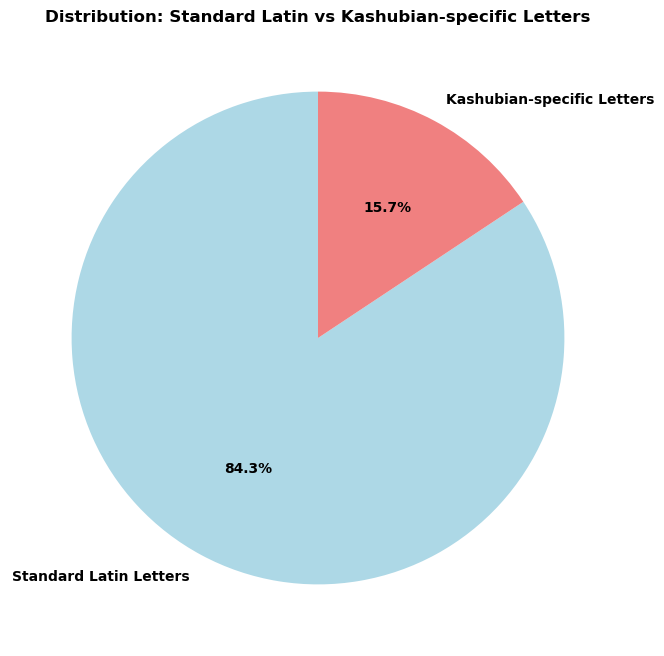

In [128]:
# standard alphabet to provide comparison
standard_latin = "abcdefghijklmnopqrstuvwxyz" 

# calculatulates total for each
standard_total = sum(kashub_counter[char] for char in standard_latin if char in kashub_counter)
kashub_specific_total = sum(kashub_counter[char] for char in kashub_alphabet if char not in standard_latin)

labels = ['Standard Latin Letters', 'Kashubian-specific Letters']
sizes = [standard_total, kashub_specific_total]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
                                   textprops={'fontweight': 'bold'})

# better contrast and visibility
for autotext in autotexts:
    autotext.set_fontweight('bold')

plt.title('Distribution: Standard Latin vs Kashubian-specific Letters', fontweight='bold')
plt.show()

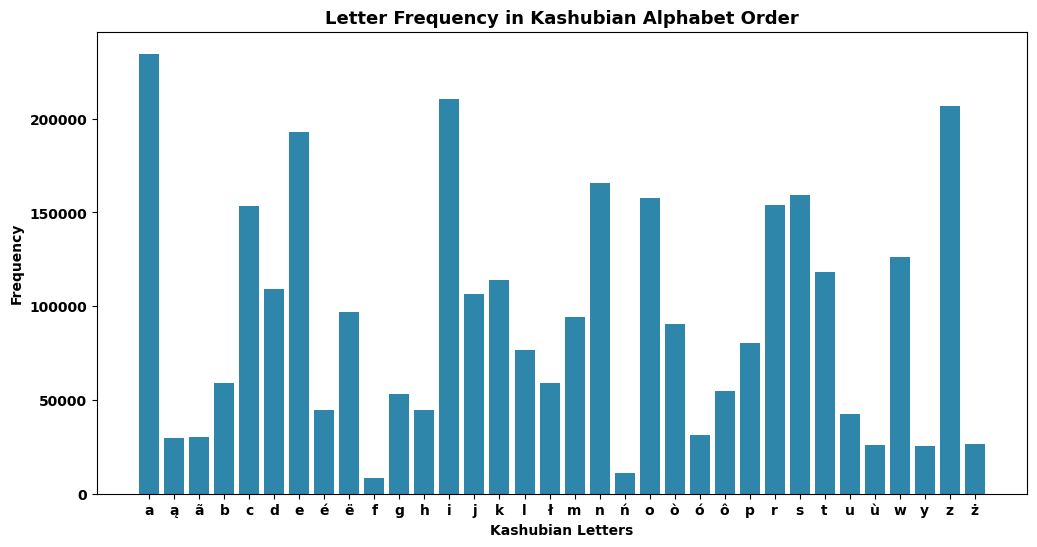

In [129]:
# ordering our letter-count pairs in order
letters = [char for char in kashub_alphabet if char in kashub_counter]
counts = [kashub_counter[char] for char in kashub_alphabet if char in kashub_counter]

# simple plot with better contrast
plt.figure(figsize=(12, 6))
plt.bar(letters, counts, color='#2E86AB')

plt.xlabel('Kashubian Letters', fontweight='bold')  
plt.ylabel('Frequency', fontweight='bold') 
plt.title('Letter Frequency in Kashubian Alphabet Order', fontweight='bold', fontsize=13)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

In [130]:
# getting the frequency of diagraphs
kashub_tokens = word_tokenize(corpus_collection_str)
digraph_list = ["ch", "cz", "dz", "dż", "rz", "sz"]

pattern = '|'.join(re.escape(dg) for dg in digraph_list)
digraph_counts = Counter(re.findall(pattern, corpus_collection_str))


print("Digraph frequencies:")
for digraph, count in digraph_counts.most_common():
    print(f"{digraph} → {count}")
    

Digraph frequencies:
cz → 48423
ch → 37853
rz → 34449
sz → 32894
dz → 24213
dż → 2776


In [131]:
# same representation as previous but in terms of percentages
total = sum(digraph_counts.values())
digraph_percentages = [(char, (count / total) * 100) for char, count in digraph_counts.most_common()]

print("Digraph percentages:")
for letter, percentage in digraph_percentages:
    print(f"{letter} → {percentage:.2f}%")

Digraph percentages:
cz → 26.81%
ch → 20.96%
rz → 19.07%
sz → 18.21%
dz → 13.41%
dż → 1.54%


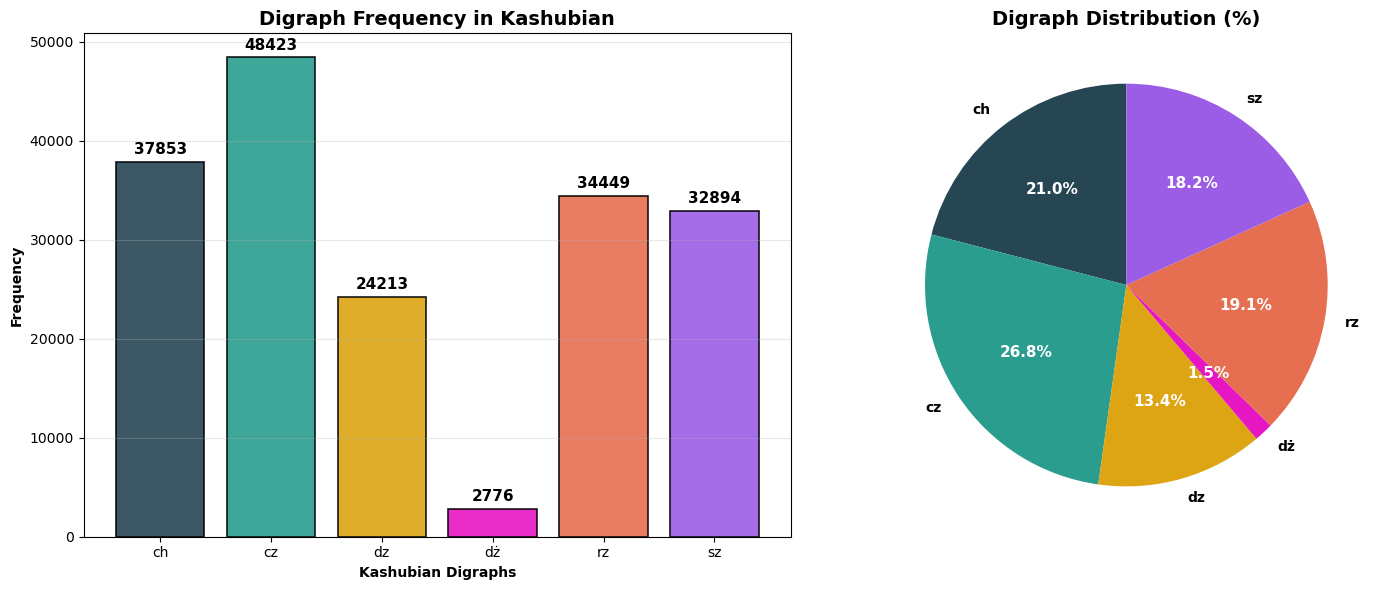

In [132]:
# ordering our digraph-count pairs
digraphs = [dg for dg in digraph_list if dg in digraph_counts]
counts = [digraph_counts[dg] for dg in digraph_list if dg in digraph_counts]

# convert digraph frequencies to percentages
total_digraphs = sum(counts)
percentages = [(count / total_digraphs) * 100 for count in counts]

# dividing our plots into 2 different sections
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

colors = ['#264653', '#2A9D8F', "#DDA413", "#E616C3", '#E76F51', '#9B5DE5']

# setup for the bars on the right
bars = ax1.bar(digraphs, counts, color=colors[:len(digraphs)], 
               edgecolor='black', linewidth=1.2, alpha=0.9)
ax1.set_xlabel('Kashubian Digraphs', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Digraph Frequency in Kashubian', fontweight='bold', fontsize=14)
ax1.tick_params(axis='x')
ax1.grid(axis='y', alpha=0.3)

for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
             f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=11)
# setup for the pie on the right
wedges, texts, autotexts = ax2.pie(counts, labels=digraphs, autopct='%1.1f%%',
                                  startangle=90, colors=colors[:len(digraphs)],
                                  textprops={'fontweight': 'bold'})
ax2.set_title('Digraph Distribution (%)', fontweight='bold', fontsize=14)

# improves contrast for the pie chart
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.tight_layout()
plt.show()